In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import objective_functions.ridge_logistic as r

from tqdm import tqdm
from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *
from read_data import *
from plots_and_weights.optimality_gaps import *
from plots_and_weights.plot_graph import *

In [2]:
[b, A] = read_data('datasets/a9a.txt')
n, d = A.shape
A = np.hstack((np.ones((n,1)), A))
d = d+1
A = A / np.sqrt((A**2).sum(axis=0))

In [3]:
rl = r.Ridge_Logistic_Regression(0.1)
st = 5 # stop time
sss = [int(0.01 * n), int(0.05 * n), int(0.1 * n)]  # sampling size
lambd = 0.1
alpha = 0.5
beta = 0.71
w, t = newton(A, b, np.zeros(d), rl, lambd, 1,  15)
w_stars = w[len(t)-1]

Newton computation time: 15.149795770645142


In [4]:
w0, t0 = newton(A, b, np.zeros(d), rl, lambd, 1, st)
w2, t2 = gd(A, b, np.zeros(d), rl, lambd, alpha, st)
w3, t3 = nesterov_gd(A, b, np.zeros(d), rl, lambd, alpha, beta, st)

Newton computation time: 5.266206979751587
GD computation time: 5.0261781215667725
Nesterov GD computation time: 5.01966404914856


Sub-sampled Newton rnss computation time: 5.014431715011597
Nesterov Sub-sampled Newton rnss computation time: 5.039175271987915
Sub-sampled Newton rnss computation time: 5.038780927658081
Nesterov Sub-sampled Newton rnss computation time: 5.0520219802856445
Sub-sampled Newton rnss computation time: 5.146366119384766
Nesterov Sub-sampled Newton rnss computation time: 5.056617259979248


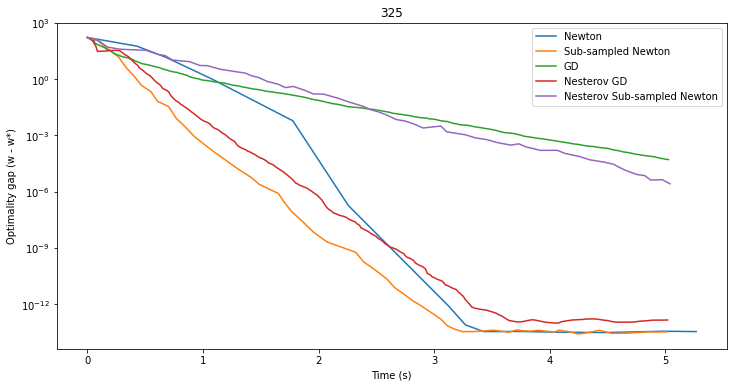

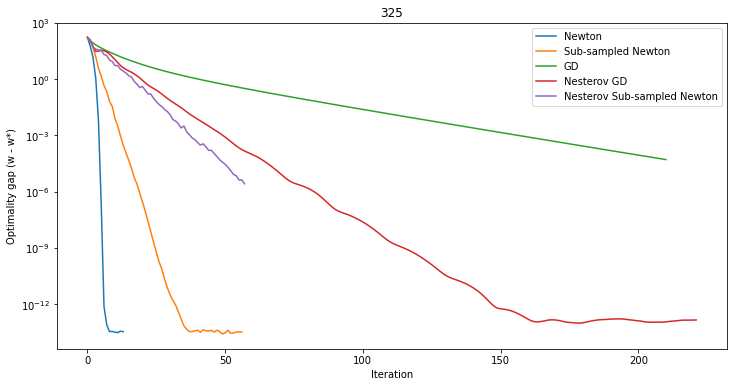

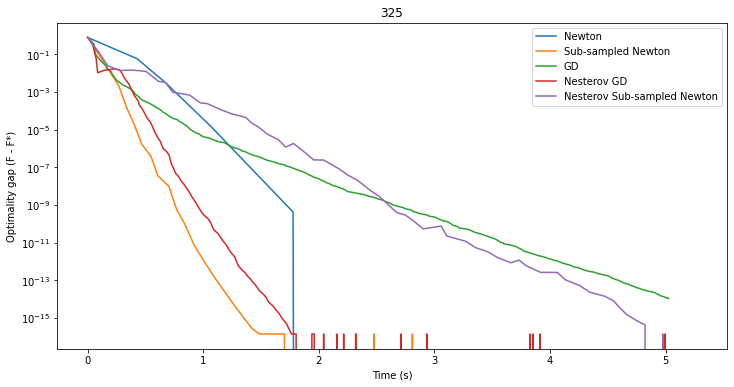

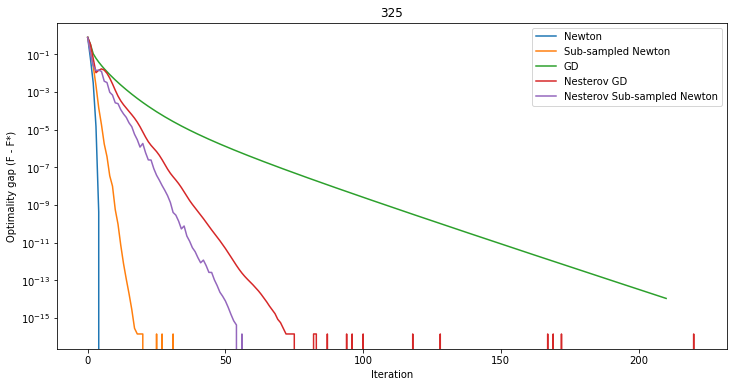

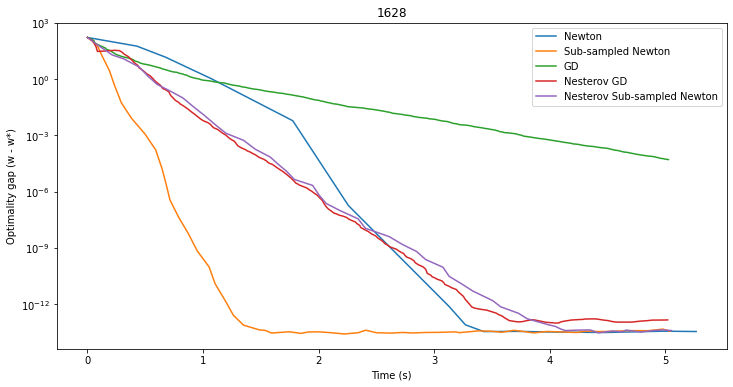

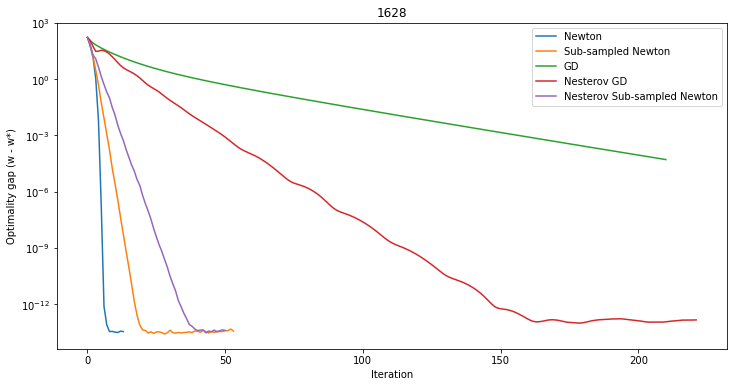

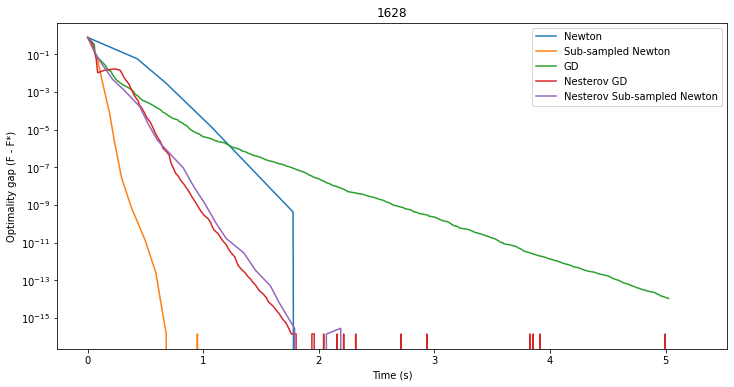

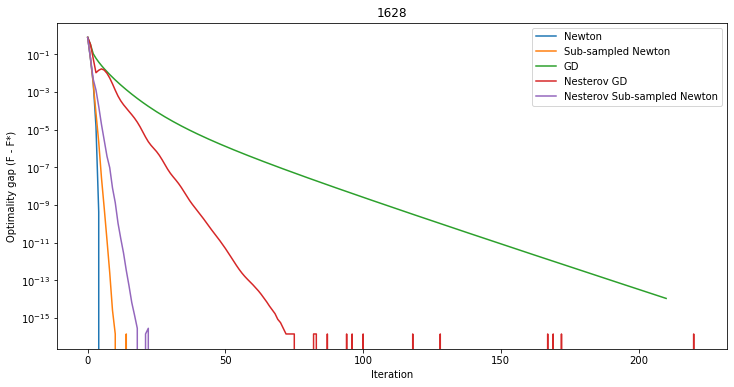

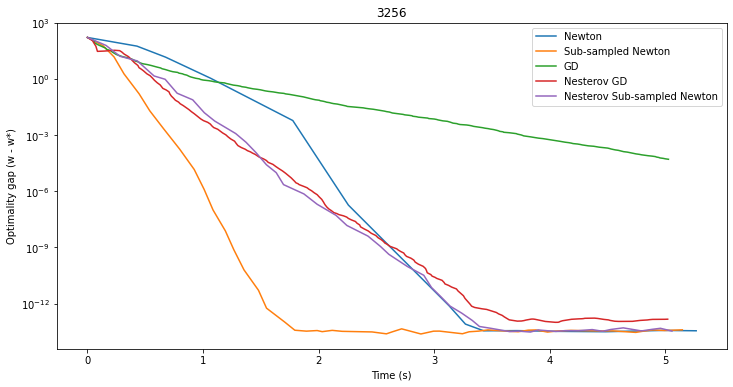

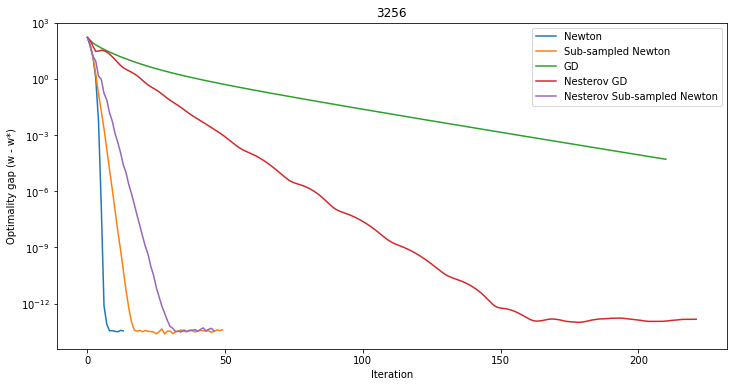

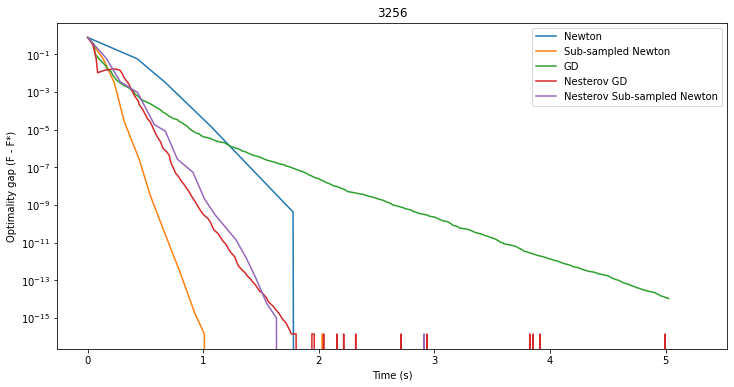

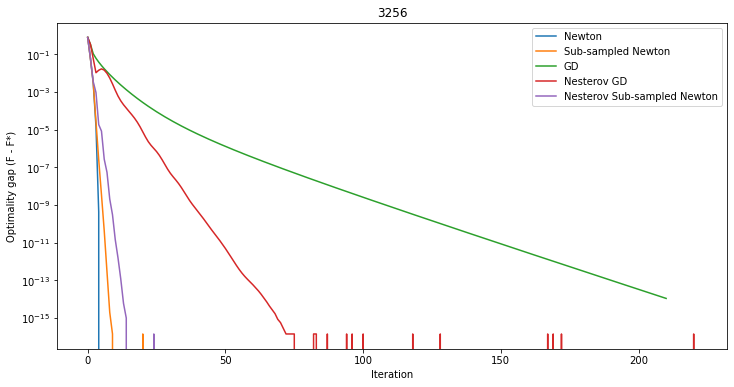

In [5]:
for ss in sss:
    w1, t1 = sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, 1, st, ss)
    w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, 1, beta, st, ss)
    ws = [w0,w1,w2,w3,w4]
    ts = [t0,t1,t2,t3,t4]
    ts_iters = [np.arange(len(t)) for t in ts]
    
    w_gaps = compute_w_gaps(ws, ts, w_stars)
    plot_graph(ts, w_gaps, 'Time (s)', 'Optimality gap (w - w*)', str(ss))
    plot_graph(ts_iters, w_gaps, 'Iteration', 'Optimality gap (w - w*)', str(ss))
    
    
    f_gaps = compute_f_gaps(A, b, ws, ts, w_stars, rl)
    plot_graph(ts, f_gaps, 'Time (s)', 'Optimality gap (F - F*)', str(ss))
    plot_graph(ts_iters, f_gaps, 'Iteration', 'Optimality gap (F - F*)', str(ss))

In [6]:
lambdas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
cns = []
for l in lambdas:
    cn = r.Ridge_Logistic_Regression(l).condition_num(A, b, np.zeros(d))
    cns.append(cn)
print(cns)

[745.2388907091175, 373.1194453545303, 75.42388907090182, 38.21194453545064, 8.442388907090091, 4.721194453545048, 1.744238890709009, 1.372119445354505]


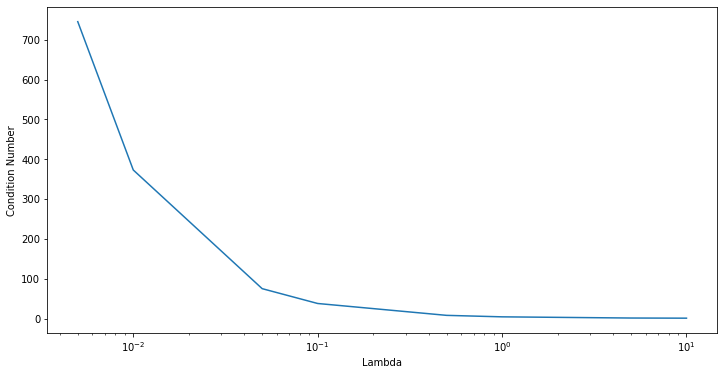

In [7]:
fig = plt.figure(figsize=(12, 6)) # set figure size
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Condition Number')
plt.plot(lambdas, cns)